In [2]:
data_file = open("mnist_dataset/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()

len(data_list)

100

In [3]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

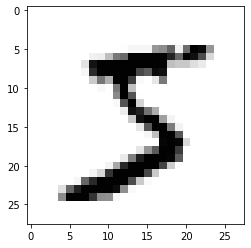

In [4]:
import numpy as np
import matplotlib.pyplot as plt

all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation="None")

0


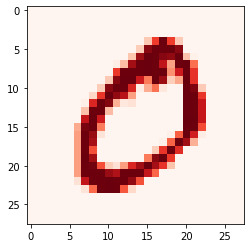

In [12]:
all_values = data_list[1].split(',')
print(all_values[1])
              
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Reds", interpolation="None")

In [55]:
# 3계층의 신경망으로 MNIST 데이터를 학습하는 코드

import numpy as np
import scipy.special
import matplotlib.pyplot as plt

class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력계층
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치 행렬
        self.wih = np.random.normal(0.0, pow(self.hnodes, - 0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, - 0.5), (self.onodes, self.hnodes))
        
        # 학습률
        self.lr = learningrate
        
        # 활성함수 - 시그모이드
        self.activation_function = lambda x: scipy.special.expit(x)
        
    # 신경망 학습
    def train(self, inputs_list, targets_list):
        # 입력리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # 은닉계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs)
        # 은닉계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종출력계층으로 들어오는 신호 계산
        final_inputs = np.dot(self.who, hidden_outputs)
        # 최종출력계층에서 들어오는 신호 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제값 - 계산값)
        output_errors = targets - final_outputs
        # 은닉계층과 출려계층 간의 가중치 업데이트
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # 은닉계층과 출력계층 간의 가중치 업데이트
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # 입력계층과 은닉계층 간의 가중치 업데이트
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
    
    # 신경망 질의
    def query(self, inputs_list):
        # 입력리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        
        # 은닉계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs)
        # 은닉계층에서 나가는 신호를 계산
        hiddne_outputs = self.activation_function(hidden_inputs)
        # 최종출력계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hiddne_outputs)
        # 최종출력계층으로 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

In [56]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률
learning_rate = 0.3

# 신경망 인스턴스 생성
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습데이터인 csv파일을 리스트로 불러오기
training_data_file = open("mnist_dataset/mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
for record in training_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 결과 값 생성(실제 값인 0.99 외에는 모두 0.01)
    targets = np.zeros(output_nodes) + 0.01
    # all_values[0]은 이 레코드에 대한 결과값
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

(100, 784)
(10, 100)


In [38]:
# mnist 테스트 데이터인 csv 파일을 리스트화
test_data_file = open("mnist_dataset/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

# 첫번째 테스트 레코드 불러오기
all_values = test_data_list[0].split(',')
print(all_values[0])

7


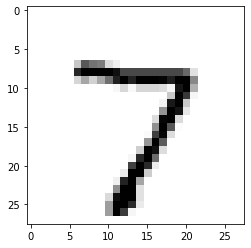

In [39]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation="None")

In [40]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.19438379],
       [0.08997046],
       [0.05307735],
       [0.18846195],
       [0.19640775],
       [0.04607023],
       [0.0527375 ],
       [0.3896058 ],
       [0.14162933],
       [0.08080467]])

In [41]:
# 신경망 테스트

# 신경망의 성능 지표가 되는 성적표를 초기화함
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 정답은 첫번째 값
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
print(scorecard)

7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
1 network's answer
9 correct label
7 network's answer
[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [42]:
# 정답의 비율
scorecard_array = np.asarray(scorecard)
print("performance =", scorecard_array.sum() / scorecard_array.size)

performance = 0.6


In [49]:
# 60,000개의 레코드 학습데이터 모음
# 10,000개의 레코드를 가지는 전체 테스트 데이터 모음

training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
for record in training_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 결과 값 생성(실제 값인 0.99 외에는 모두 0.01)
    targets = np.zeros(output_nodes) + 0.01
    # all_values[0]은 이 레코드에 대한 결과값
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)


    
# 신경망의 성능 지표가 되는 성적표를 초기화함
scorecard = []

test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 정답은 첫번째 값
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    #print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
        
# 정답의 비율
scorecard_array = np.asarray(scorecard)
print("performance =", scorecard_array.sum() / scorecard_array.size)

performance = 0.9468


In [ ]:
# 학습률을 바꿔 성능개선하기 (0.3 -> 0.2)

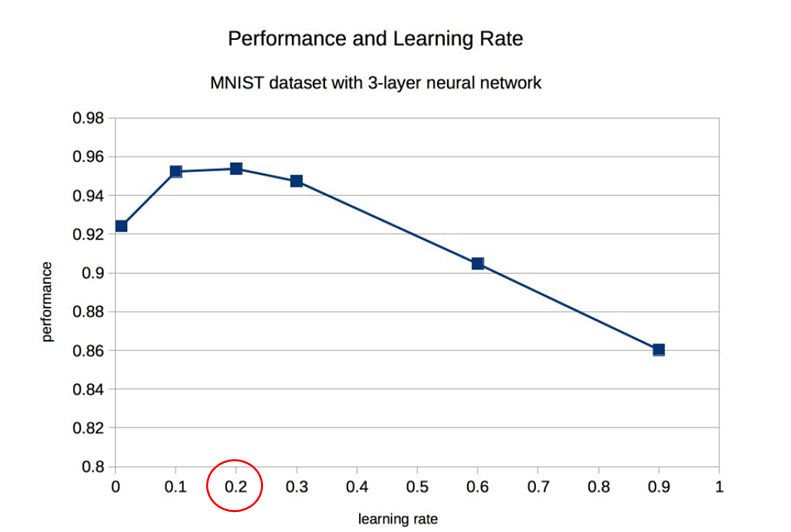

In [50]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률
learning_rate = 0.2

# 신경망 인스턴스 생성
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# 60,000개의 레코드 학습데이터 모음
# 10,000개의 레코드를 가지는 전체 테스트 데이터 모음

training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
for record in training_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 결과 값 생성(실제 값인 0.99 외에는 모두 0.01)
    targets = np.zeros(output_nodes) + 0.01
    # all_values[0]은 이 레코드에 대한 결과값
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)


    
# 신경망의 성능 지표가 되는 성적표를 초기화함
scorecard = []

test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 정답은 첫번째 값
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    #print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
        
# 정답의 비율
scorecard_array = np.asarray(scorecard)
print("performance =", scorecard_array.sum() / scorecard_array.size)

performance = 0.9466


### 여러 번 수행을 통한 신경망 개선

In [53]:
# 주기(epoch)란 학습데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 2

# 신경망 학습시키기
for e in range(epochs):
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(",")
        # 입력 값의 범위와 값 조정
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # 결과 값 생성(실제 값인 0.99 외에는 모두 0.01)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0]은 이 레코드에 대한 결과값
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
    
for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 정답은 첫번째 값
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    #print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
        
# 정답의 비율
scorecard_array = np.asarray(scorecard)
print("performance =", scorecard_array.sum() / scorecard_array.size)

performance = 0.9562666666666667


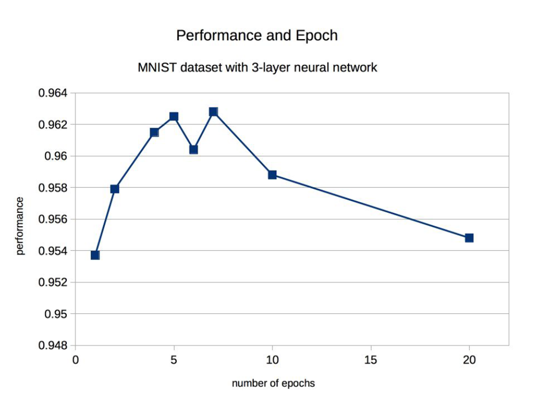

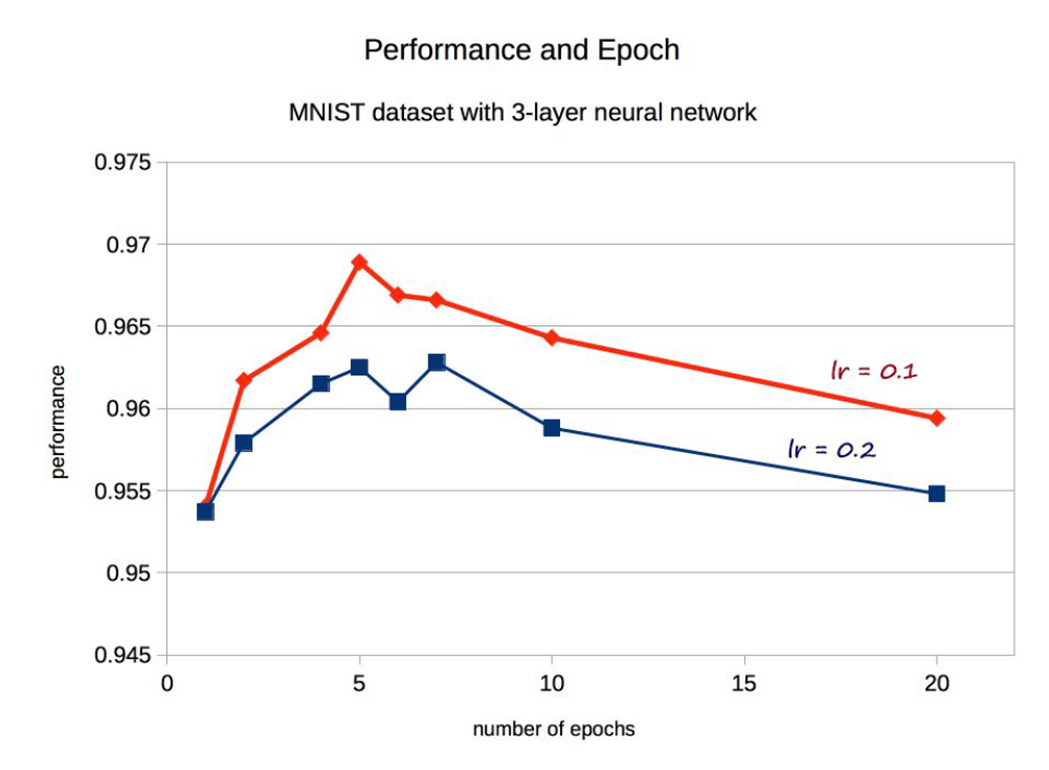

### 은닉계층에 따른 성능 개선

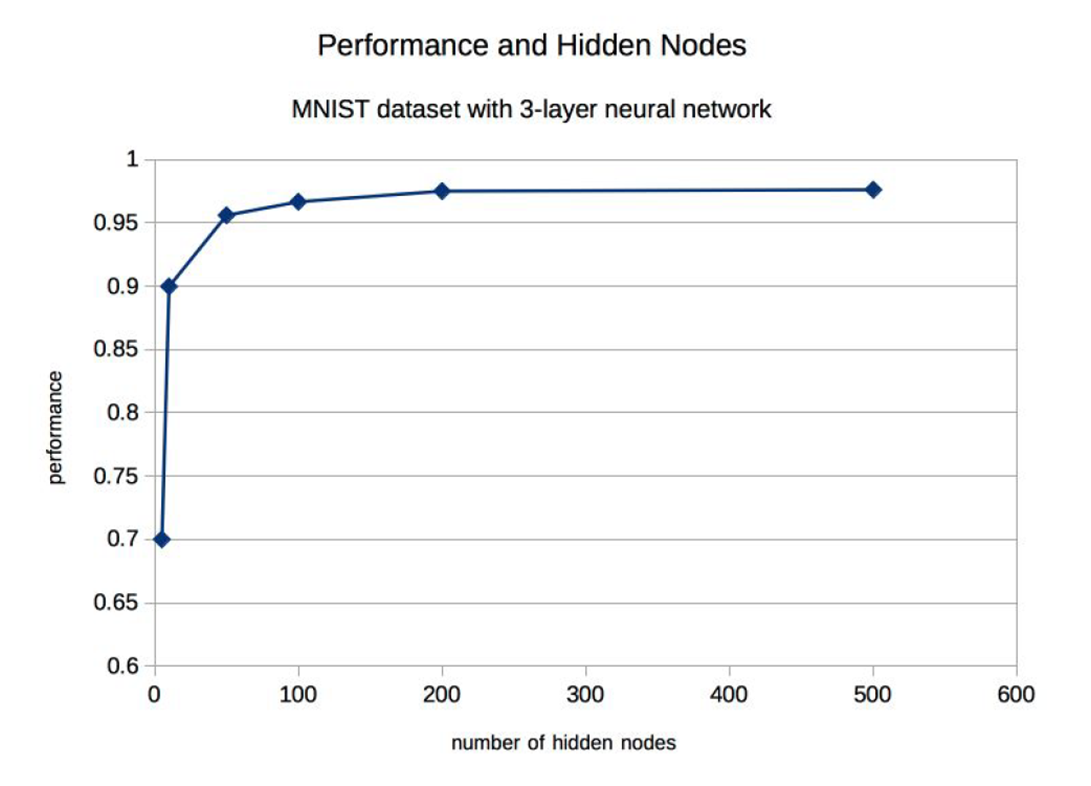

### 종합 - 최적의 성능

In [54]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률
learning_rate = 0.1

# 신경망 인스턴스 생성
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


# 60,000개의 레코드 학습데이터 모음
# 10,000개의 레코드를 가지는 전체 테스트 데이터 모음
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# 주기를 통해 신경망 학습
epochs = 5

# 신경망 학습시키기
for e in range(epochs):
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(",")
        # 입력 값의 범위와 값 조정
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # 결과 값 생성(실제 값인 0.99 외에는 모두 0.01)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0]은 이 레코드에 대한 결과값
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)


    
# 신경망의 성능 지표가 되는 성적표를 초기화함
scorecard = []

test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 정답은 첫번째 값
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    #print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
# 정답의 비율
scorecard_array = np.asarray(scorecard)
print("performance =", scorecard_array.sum() / scorecard_array.size)

performance = 0.9666
